# Using a pretrained convnet
### Fine Tuning
###### Thus the steps for fine-tuning a network are as follow:
###### 1 Add your custom network on top of an already-trained base network.
###### 2 Freeze the base network.
###### 3 Train the part you added.
###### 4 Unfreeze some layers in the base network.
###### 5 Jointly train both these layers and the part you added.

In [1]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
include_top=False,
input_shape=(150, 150, 3))

Using TensorFlow backend.


In [2]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [3]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
base_dir = 'D:/c/Desktop/PIAIC/Artificial Intelligent/3rd Quarter/deep learning/sir nasir/Complte chptrs 5 material/Glass and Table_model/working'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Unfreezed Conv2D top layer for Fine Tuning


In [4]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


# Freezing all layers up to a specific one

In [6]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

# Training the model end to end with a frozen convolutional base

In [7]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
            validation_dir,
            target_size=(150, 150),
            batch_size=20,
            class_mode='binary')

Found 4000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [8]:
model.compile(loss='binary_crossentropy',
            optimizer=optimizers.RMSprop(lr=2e-5),
            metrics=['acc'])

In [9]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [10]:
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,validation_steps=50)

Epoch 1/30
 99/100 [============================>.] - ETA: 3s - loss: 0.2282 - acc: 0.9061

C:\Users\REHMAN COMPUTER\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:804: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


100/100 [==============================] - 503s 5s/step - loss: 0.2266 - acc: 0.9065 - val_loss: 0.0038 - val_acc: 0.9930
Epoch 2/30
  9/100 [=>............................] - ETA: 5:33 - loss: 0.1001 - acc: 0.9667

C:\Users\REHMAN COMPUTER\Anaconda3\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


100/100 [==============================] - 517s 5s/step - loss: 0.1064 - acc: 0.9585 - val_loss: 0.0334 - val_acc: 0.9930
Epoch 3/30
100/100 [==============================] - 523s 5s/step - loss: 0.0947 - acc: 0.9645 - val_loss: 0.0034 - val_acc: 0.9740
Epoch 4/30
100/100 [==============================] - 510s 5s/step - loss: 0.0864 - acc: 0.9720 - val_loss: 0.0408 - val_acc: 0.9890
Epoch 5/30
100/100 [==============================] - 465s 5s/step - loss: 0.0769 - acc: 0.9755 - val_loss: 0.0161 - val_acc: 0.9820
Epoch 6/30
100/100 [==============================] - 462s 5s/step - loss: 0.0559 - acc: 0.9835 - val_loss: 0.0038 - val_acc: 0.9940
Epoch 7/30
100/100 [==============================] - 484s 5s/step - loss: 0.0506 - acc: 0.9815 - val_loss: 0.0232 - val_acc: 0.9890
Epoch 8/30
100/100 [==============================] - 462s 5s/step - loss: 0.0494 - acc: 0.9820 - val_loss: 0.0010 - val_acc: 0.9960
Epoch 9/30
100/100 [==============================] - 458s 5s/step - loss: 0.050

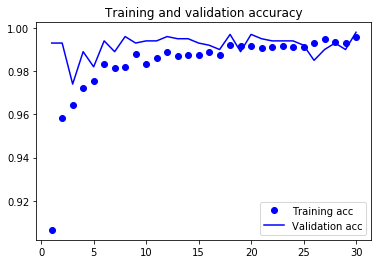

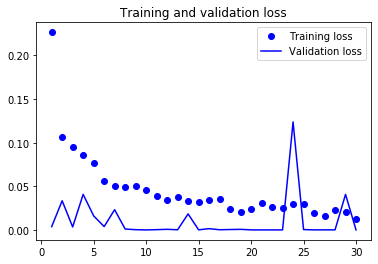

In [12]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [13]:
model.save("Glass_N_Tables_FineTune.h5")